In [2]:
# --------------
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Code starts here
data = pd.read_csv("Data.csv")
print(data.head())
data.shape
data.describe
data = data.drop('Serial Number',1)

   Serial Number  total_net_assets  net_annual_expenses_ratio  \
0           3935         284820000                       1.55   
1          13836          71810000                       1.45   
2           8956        6880000000                       0.94   
3           9142         399430000                       1.00   
4           5796         656280000                       2.69   

   morningstar_rating  portfolio_cash  portfolio_stocks  portfolio_bonds  \
0                   3            6.97             14.80            77.25   
1                   2           10.84             29.59            58.51   
2                   4            0.78             99.22             0.00   
3                   2            0.51             99.49             0.00   
4                   4            7.78             23.60            68.49   

   portfolio_others  portfolio_preferred  portfolio_convertable  ...  \
0              0.97                 0.00                   0.00  ...   
1       

In [11]:
data.head(10)


,total_net_assets,net_annual_expenses_ratio,portfolio_cash,portfolio_bonds,portfolio_others,portfolio_preferred,portfolio_convertable,sectors_basic_materials,sectors_consumer_cyclical,sectors_financial_services,...,category_102,category_103,category_104,category_105,category_106,category_107,investment_0,investment_1,investment_2,bonds_aaa
0,284820000,1.55,6.97,77.25,0.97,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00
1,71810000,1.45,10.84,58.51,0.94,0.01,0.01,7.07,15.33,16.54,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62.54
2,6880000000,0.94,0.78,0.00,0.00,0.00,0.00,4.96,10.35,28.78,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00
3,399430000,1.00,0.51,0.00,0.00,0.00,0.00,5.61,27.77,10.69,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00
4,656280000,2.69,7.78,68.49,0.11,0.00,0.02,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00
5,611090000,0.83,1.80,60.23,0.03,0.00,0.00,3.21,12.60,10.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,77.01
6,4640000000,0.98,3.12,96.56,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.28
7,70080000,0.89,4.16,0.00,0.00,0.00,0.00,6.62,11.55,21.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00
8,1050000000,0.43,15.45,80.83,1.58,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00
9,125150000,0.55,0.79,99.21,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,100.00


In [12]:

# --------------
#Importing header files
from scipy.stats import chi2_contingency
import scipy.stats as stats

#Critical value 
critical_value = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 11)   # Df = number of variable categories(in purpose) - 1

# Code starts here
prob = 0.95
return_rating = data["morningstar_return_rating"].value_counts()
risk_rating = data["morningstar_risk_rating"].value_counts()
observed = pd.concat([return_rating.transpose() ,risk_rating.transpose()] , axis=1 , keys= ['return','risk'])
print(observed)

chi2 , p, dof, ex = chi2_contingency(observed)
if abs(chi2) >= critical_value:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')


# Code ends here


   return  risk
3    3892  3845
4    2628  2614
2    2422  2218
0    1236  1236
5     956  1080
1     764   905
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [13]:

# --------------
# Code starts here
correlation = abs(data.corr())
#print(correlation)
us_correlation = correlation.unstack()
#us_correlation = pd.DataFrame(us_correlation)
us_correlation = us_correlation.sort_values(ascending = False)
max_correlated = us_correlation[(us_correlation>0.75) & (us_correlation<1)]
# print(max_correlated, np.unique(max_correlated.index.get_level_values(0)))
# data = data.drop(np.unique(max_correlated.index.get_level_values(0)), 1)
#print(data[max_correlated.index])
data.drop('morningstar_rating',1, inplace=True)
data.drop('portfolio_stocks',1, inplace=True)
data.drop('category_12',1, inplace=True)
# data.drop('morningstar_return_rating',1)
# data.drop('sharpe_ratio_3y',1)
# data.drop('sharpe_ratio_3y',1)
data.drop('sharpe_ratio_3y',1, inplace=True)
# data.drop('sharpe_ratio_3y',1)
# code ends here

KeyError: "['morningstar_rating'] not found in axis"

Text(0.5, 1.0, 'net_annual_expenses_ratio')

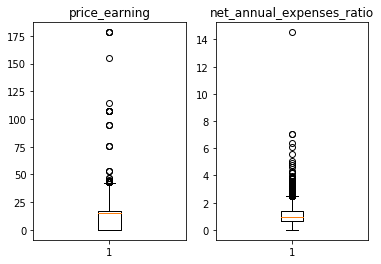

In [14]:
# --------------
# Code starts here
f, (ax_1, ax_2) = plt.subplots(1, 2)
ax_1.boxplot(data['price_earning'])
ax_1.set_title('price_earning')
ax_2.boxplot(data["net_annual_expenses_ratio"])
ax_2.set_title('net_annual_expenses_ratio')

# code ends here

In [15]:
# --------------
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
# Code starts here
X = data.drop('bonds_aaa',1)
y = data['bonds_aaa'].copy()
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size = 0.3 , random_state = 3)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
rmse = sqrt(mean_squared_error(y_test,y_pred))
print("The RMSE of model is:",round(rmse))
# Code ends here

The RMSE of model is: 16


In [8]:










# --------------
# import libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import LinearRegression
# regularization parameters for grid search
ridge_lambdas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]
lasso_lambdas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]

# Code starts here
regressor = LinearRegression()
ridge_model = Ridge(random_state = 0)
ridge_grid = GridSearchCV(estimator=ridge_model, param_grid=dict(alpha=ridge_lambdas))
ridge_grid.fit(X_train,y_train)
ridge_pred = ridge_grid.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(ridge_pred,y_test))
print("Ridge RMSE:",ridge_rmse)

lasso_model = Lasso(random_state = 0)
lasso_grid = GridSearchCV(estimator=lasso_model, param_grid=dict(alpha=lasso_lambdas))
lasso_grid.fit(X_train,y_train)
lasso_pred = lasso_grid.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(lasso_pred,y_test))
print("Lasso RMSE:",lasso_rmse)


# Code ends here

C:\Program Files (x86)\Anaconda_Python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Program Files (x86)\Anaconda_Python\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.75827e-26): result may not be accurate.
  overwrite_a=True).T
C:\Program Files (x86)\Anaconda_Python\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.6933e-26): result may not be accurate.
  overwrite_a=True).T
C:\Program Files (x86)\Anaconda_Python\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.86067e-26): result may not be accurate.
  overwrite_a=True).T
C:\Program Files (x86)\Anaconda_Python\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: 

Ridge RMSE: 15.720131026226944


C:\Program Files (x86)\Anaconda_Python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Program Files (x86)\Anaconda_Python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Program Files (x86)\Anaconda_Python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Program Files (x86)\Anaconda_Python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarni

Lasso RMSE: 15.719153628852961


C:\Program Files (x86)\Anaconda_Python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
